ชุดข้อมูลนี้เป็นการต่อยอดจากชุดข้อมูลการขายวิดีโอเกมของ **@baynebrannen** ปี 2020 และชุดข้อมูลการขายวิดีโอเกมของ **@ashaheedq** ปี 2019

การสร้างชุดข้อมูลนี้ได้รับแรงบันดาลใจจาก **@VinceTheCat02**

ข้อมูลถูกเก็บรวบรวมโดยการรันสไปเดอร์ที่เขียนโดย **@baynebrannen** เพื่อสร้างชุดข้อมูลของเขา

ผมไม่ได้ทำการปรับเปลี่ยนวิธีการเก็บรวบรวมหรือโครงสร้างของชุดข้อมูลใหญ่ๆ มากนัก
ผมได้ลบคอลัมน์บางคอลัมน์ที่ไม่เกี่ยวข้อง เช่น 'vg_score', 'user_score', และ 'total_shipped' เนื่องจากคอลัมน์เหล่านี้มีค่า null เยอะ คอลัมน์อื่นๆ ยังคงเหมือนเดิม

**คอลัมน์ประกอบด้วย 14 คอลัมน์**

* **img** หมายถึง URL สำหรับภาพปกของเกมที่อยู่บนเว็บไซต์ vgchartz.com (ประเภท: สตริง)
* **title** หมายถึง ชื่อของเกม (ประเภท: สตริง)
* **console** หมายถึง คอนโซลที่เกมได้รับการเปิดตัวสำหรับ  (ประเภท: สตริง)
* **genre** หมายถึง ประเภทของเกม (ประเภท: สตริง)
* **publisher** หมายถึง ผู้จัดจำหน่ายของเกม (ประเภท: สตริง)
* **developer** หมายถึง ผู้พัฒนาเกม (ประเภท: สตริง)
* **critic_score** หมายถึง คะแนน Metacritic (ในช่วง 0-10) (ประเภท: จำนวนจริง)
* **total_sales** หมายถึง ยอดขายรวมของก็อปปี้เกมทั่วโลกในหลักล้าน (ประเภท: จำนวนจริง)
* **na_sales** หมายถึง ยอดขายในภูมิภาคอเมริกาเหนือในหลักล้าน (ประเภท: จำนวนจริง)
* **jp_sales** หมายถึง ยอดขายในภูมิภาคญี่ปุ่นในหลักล้าน (ประเภท: จำนวนจริง)
* **pal_sales** หมายถึง ยอดขายในภูมิภาคยุโรป/แอฟริกาในหลักล้าน (ประเภท: จำนวนจริง)
* **other_sales** หมายถึง ยอดขายอื่นๆ ในหลักล้าน (ประเภท: จำนวนจริง)
* **release_date** หมายถึง วันที่เกมถูกเปิดตัว (ประเภท: วันที่และเวลา)
* **last_update** หมายถึง วันที่ข้อมูลถูกอัปเดตล่าสุด (ประเภท: วันที่และเวลา)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/video-game-sales-2024/vgchartz-2024.csv')

In [3]:
df.shape

(64016, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [5]:
df.describe().T

count      mean       std  min   25%   50%   75%    max
critic_score   6678.0  7.220440  1.457066  1.0  6.40  7.50  8.30  10.00
total_sales   18922.0  0.349113  0.807462  0.0  0.03  0.12  0.34  20.32
na_sales      12637.0  0.264740  0.494787  0.0  0.05  0.12  0.28   9.76
jp_sales       6726.0  0.102281  0.168811  0.0  0.02  0.04  0.12   2.13
pal_sales     12824.0  0.149472  0.392653  0.0  0.01  0.04  0.14   9.85
other_sales   15128.0  0.043041  0.126643  0.0  0.00  0.01  0.03   3.12

In [6]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

สิ่งที่ต้องการวิเคราะห์:
1. เกมยอดนิยมสุด: 
* ระบุเกมยอดขายสูงสุด 10 เกมและแพลตฟอร์มยอดนิยมของพวกเขา
2. ประสิทธิภาพของแนวเกม:
* สำรวจแนวเกมที่มีคะแนนวิจารณ์สูงสุดและยอดขาย
* วิเคราะห์ยอดขายรวมตามแนวเกม
3. อิทธิพลของสำนักพิมพ์:
* สำรวจสำนักพิมพ์ที่มีการเปิดตัวมากที่สุดและประสิทธิภาพการขายของพวกเขา
* เปรียบเทียบยอดขายระหว่างสำนักพิมพ์ต่างๆ
4. ความชอบท้องถิ่น:
* วิเคราะห์ความชอบในแนวเกมทั่วโลก
* สำรวจการกระจายขายในภูมิภาคเหนืออเมริกา ญี่ปุ่น และภูมิภาค PAL
5. รอยัลของแพลตฟอร์ม:
* เปรียบเทียบแนวโน้มการขายระหว่างแพลตฟอร์มที่เก่าและใหม่
* ระบุแพลตฟอร์มที่มียอดขายเฉลี่ยต่อเกมสูงสุด
6. ผลกระทบจากวันที่เปิดตัว:
* สำรวจความสัมพันธ์ระหว่างวันที่เปิดตัวและประสิทธิภาพการขาย
7. อิทธิพลของผู้พัฒนา:
* สำรวจอิทธิพลของผู้พัฒนาต่อคะแนนวิจารณ์และยอดขาย
8. ความยืดหยุ่นของการขาย:
* ระบุเกมที่มียอดขายยาวนาน
* สำรวจปัจจัยที่มีส่วนร่วมในความสำเร็จของพวกเขา
9. ผลของวิจารณ์:
* สำรวจผลกระทบของรีวิวจากวิจารณ์ต่อประสิทธิภาพของเกม

# 1.1 เกมยอดนิยมสูงสุด

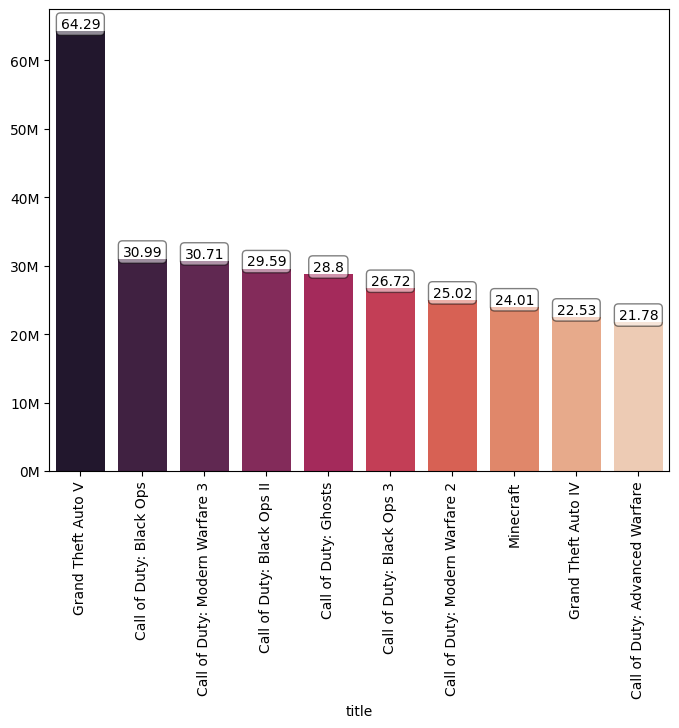

In [7]:
top_selling_games=df.groupby('title')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,6))
ax=sns.barplot(data=df,x=top_selling_games.index,y=top_selling_games.values,palette='rocket')
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.xticks(rotation=90)
plt.show()

# 1.2 เกมยอดนิยมสูงสุด แบ่งตามแพลตฟอร์ม

In [8]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)

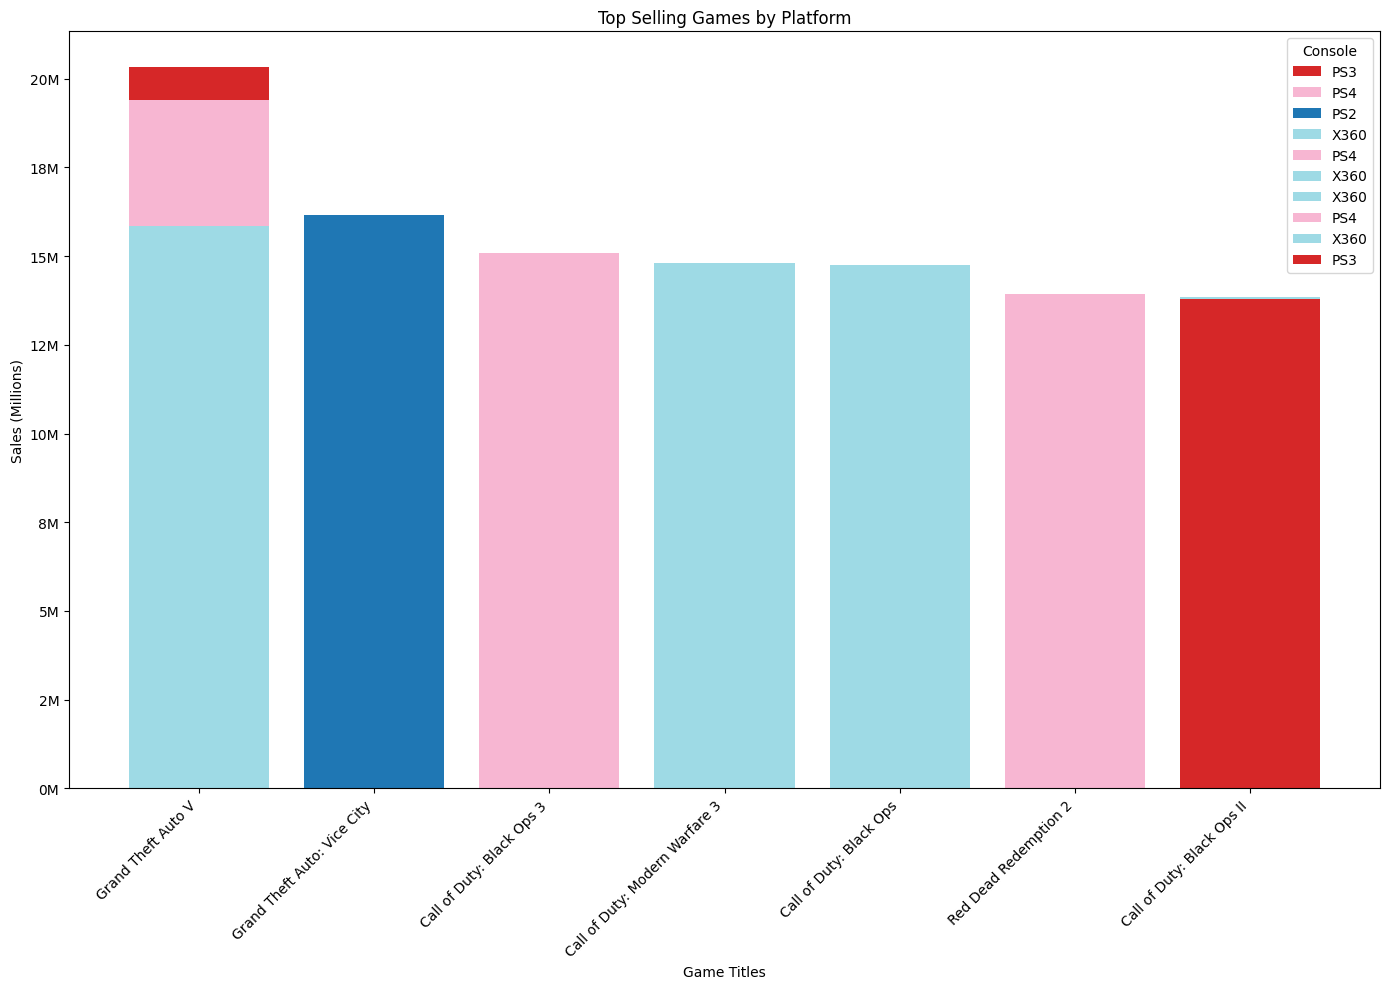

In [9]:
import matplotlib.pyplot as plt
import numpy as np

titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_consoles)))
console_colors = dict(zip(unique_consoles, colors))

# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    color = console_colors[console]
    plt.bar(titles[i], sales_in_millions[i], color=color, label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

# 2. ประเภทเกมที่มีคะแนนและยอดขายสูงสุด :

In [10]:
genre_stats=df.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

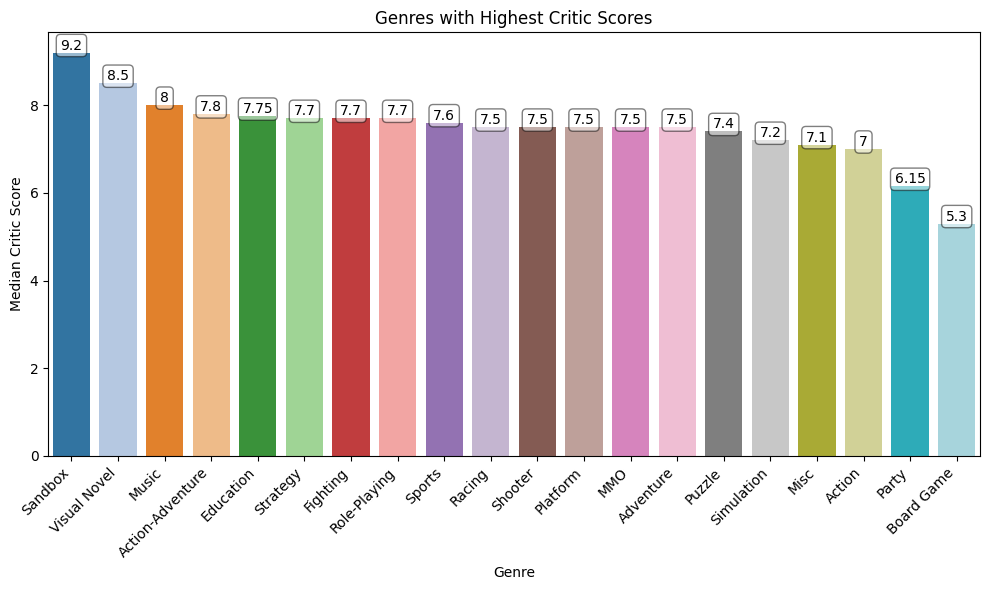

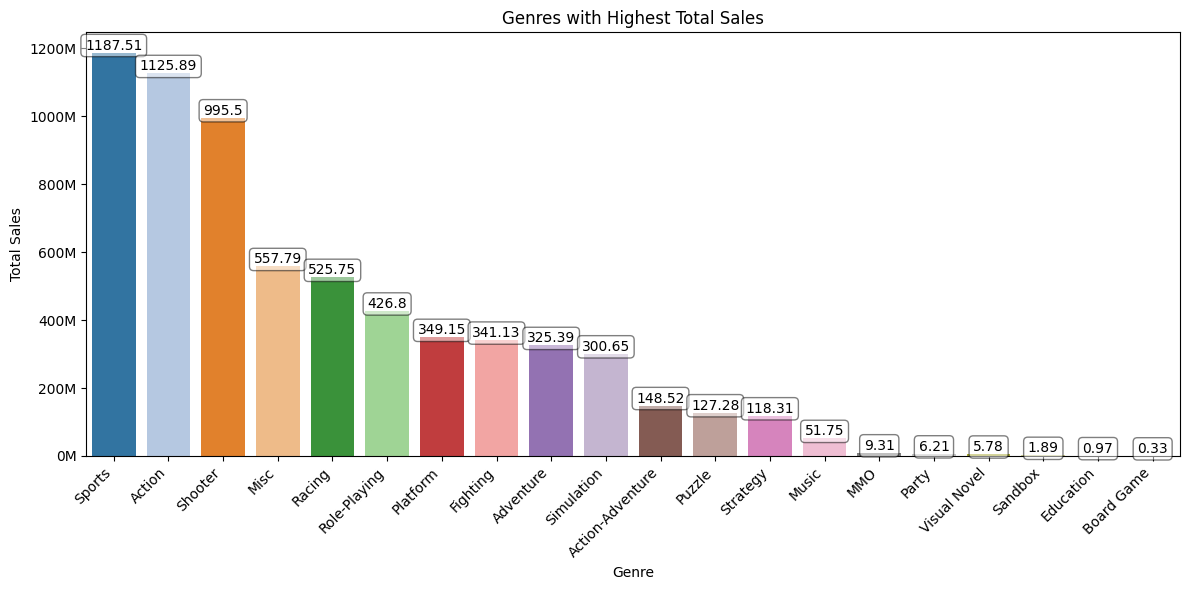

In [11]:
palette = sns.color_palette("tab20", len(sorted_genres_by_score))

plt.figure(figsize=(10, 6))
ax=sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'], palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.title('Genres with Highest Critic Scores')
plt.xlabel('Genre')
plt.ylabel('Median Critic Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
ax=sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'], palette=palette)
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3.1 ผู้จัดจำหน่ายกับยอดสูงสุดในการจัดจำหน่ายและการขาย :

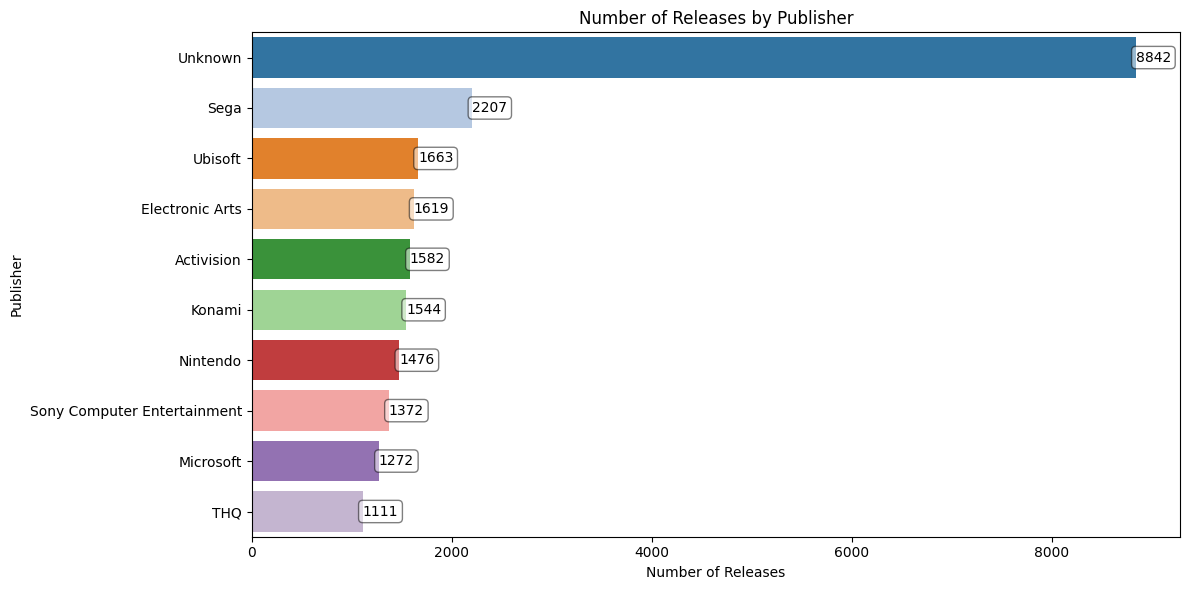

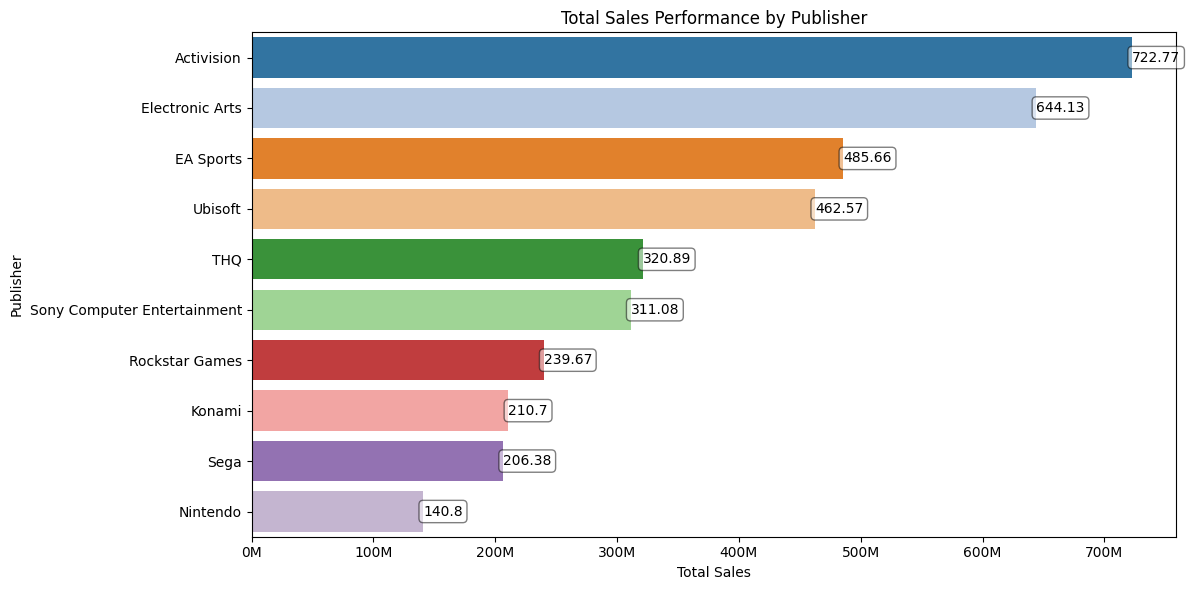

In [12]:
publisher_stats = df.groupby('publisher').agg({
    'title': 'count',
    'total_sales': 'sum'
}).reset_index()

# Sort publishers by number of releases
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)
palette = sns.color_palette("tab20", len(sorted_genres_by_score))

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num, palette=palette)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.title('Number of Releases by Publisher')
plt.xlabel('Number of Releases')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# Plot sales performance by publisher
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales, palette=palette)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Total Sales Performance by Publisher')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

# 3.2 เปรียบเทียบการขาย ของแต่ละผู้จัดจำหน่าย :

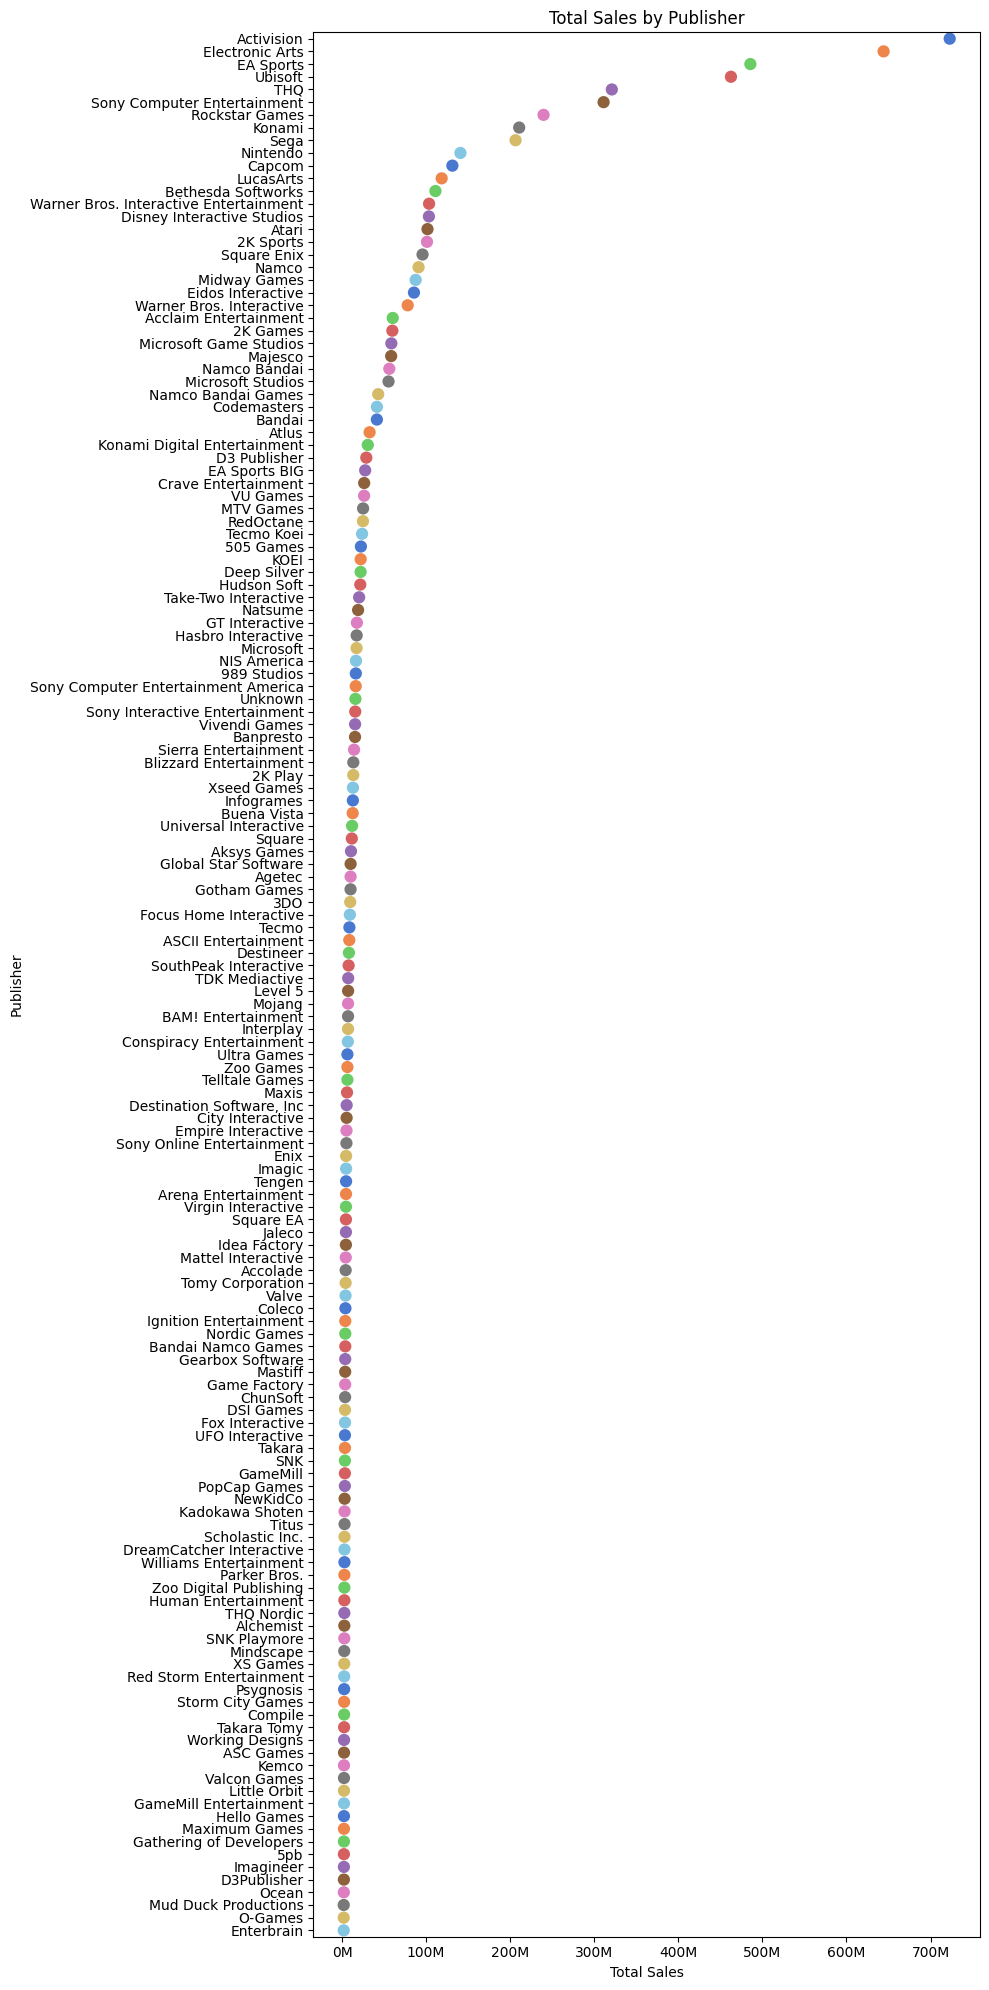

In [13]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

# Sort publishers by total sales
sorted_publishers = publisher_sales.sort_values(by='total_sales', ascending=False).head(150)

# Plot total sales by publisher using a point plot
plt.figure(figsize=(10, 20))
ax=sns.pointplot(x='total_sales', y='publisher', data=sorted_publishers, join=False, palette='muted')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Total Sales by Publisher')
plt.tight_layout()
plt.show()

# 4.1 วิเคราะห์ประเภททั่วประเทศ :


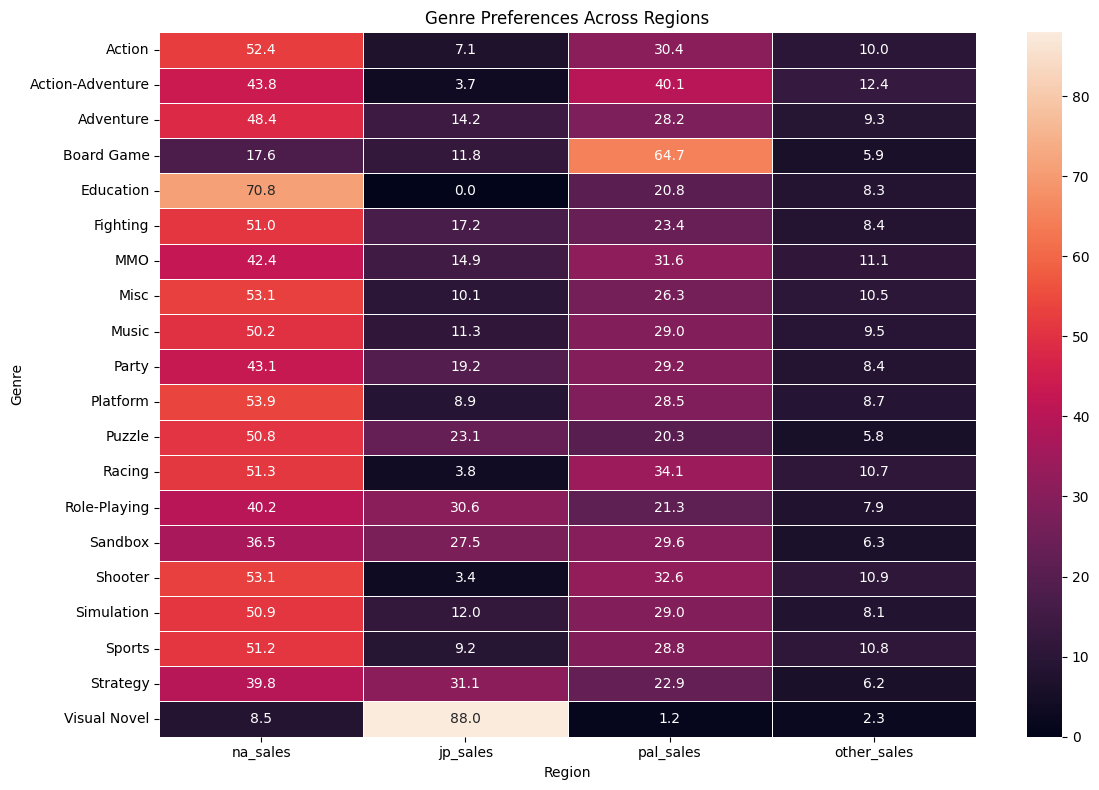

In [14]:
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalize sales data to get percentages
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

# 4.2 สำรวจการกระจายขายในภูมิภาคเหนืออเมริกา ญี่ปุ่น และภูมิภาค PAL:

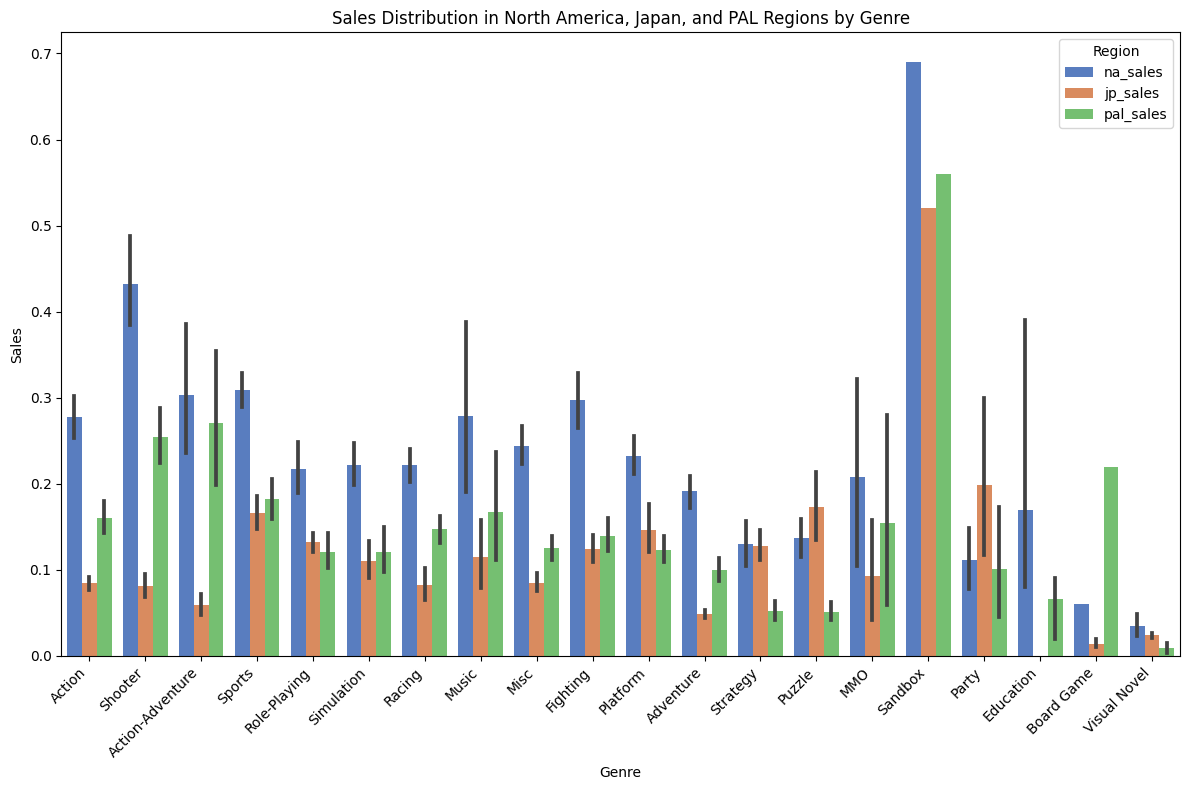

In [15]:
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Melt the DataFrame to long format for easier plotting
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='sales')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='sales', hue='region', palette='muted')
plt.title('Sales Distribution in North America, Japan, and PAL Regions by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.tight_layout()
plt.show()

# 5.1 เปรียบเทียบแนวโน้มการขายระหว่างแพลตฟอร์มที่เก่าและใหม่:

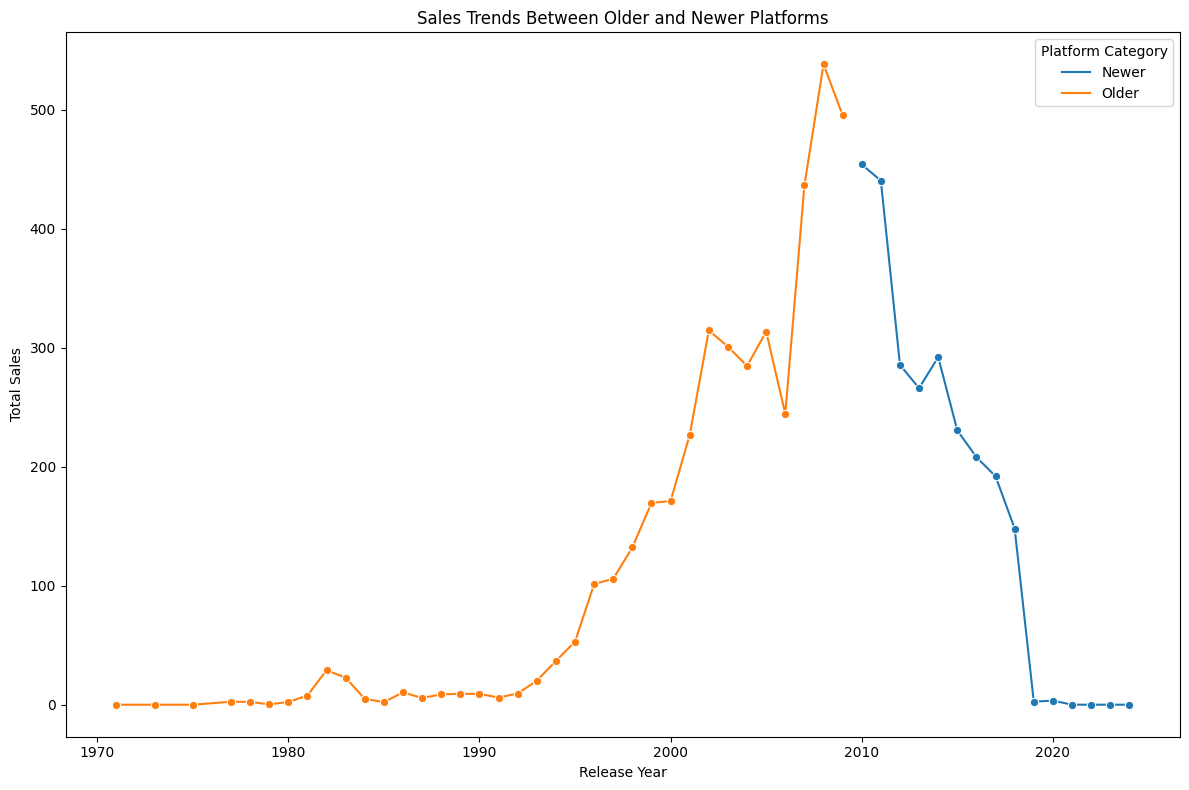

In [16]:
threshold_release_year = 2010

df['release_date'] = pd.to_datetime(df['release_date'])
df['platform_category'] = np.where(df['release_date'].dt.year < threshold_release_year, 'Older', 'Newer')
sales_trends = df.groupby(['platform_category', df['release_date'].dt.year])['total_sales'].sum().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=sales_trends, x='release_date', y='total_sales', hue='platform_category', marker='o')
plt.title('Sales Trends Between Older and Newer Platforms')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.tight_layout()
plt.show()

# 5.2 แพลตฟอร์มที่มียอดขายเฉลี่ยต่อเกมสูงสุด:

In [17]:
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False)

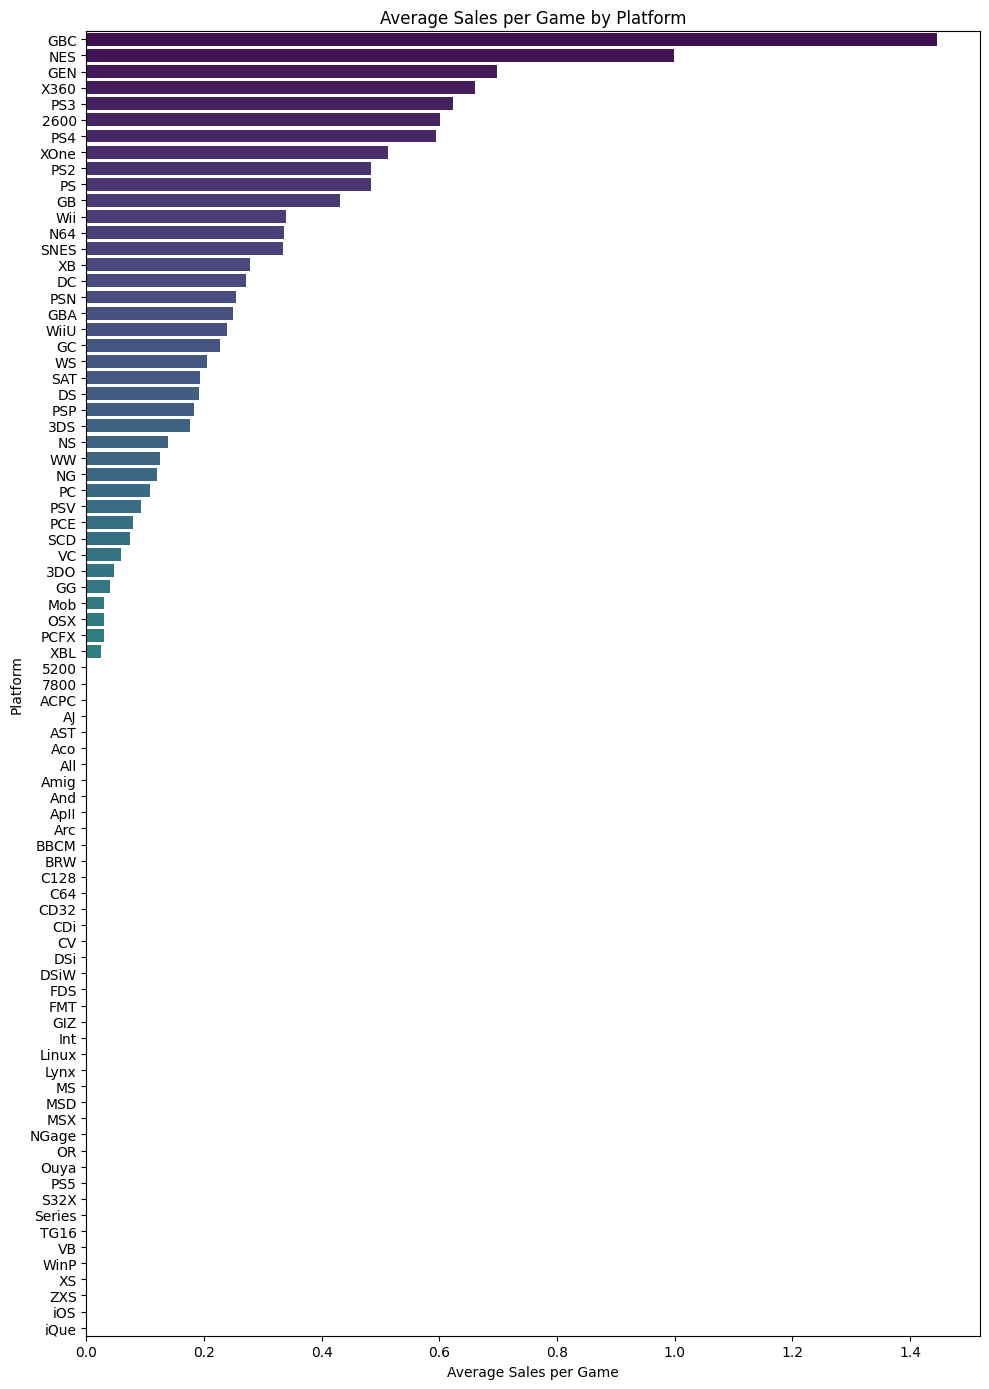

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already calculated average_sales_per_game

# Plotting the bar plot
plt.figure(figsize=(10, 14))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index, palette='viridis')
plt.xlabel('Average Sales per Game')
plt.ylabel('Platform')
plt.title('Average Sales per Game by Platform')
plt.tight_layout()
plt.show()

# 6. ผลกระทบจากวันที่เปิดตัว:

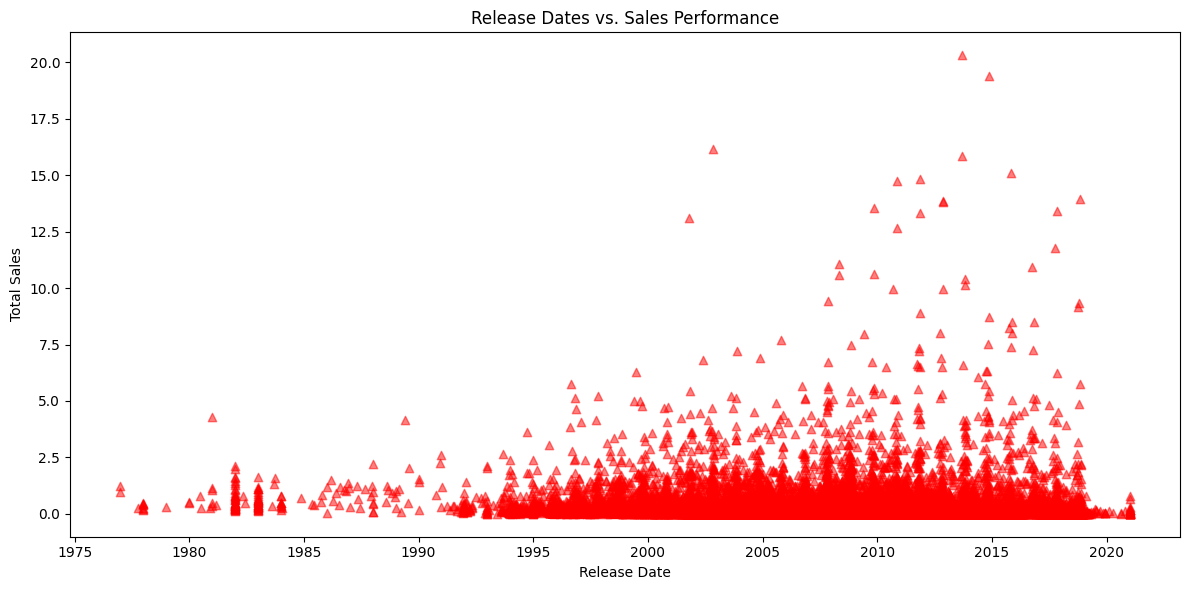

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['release_date'], df['total_sales'], alpha=0.5,c='r',marker='^')
plt.title('Release Dates vs. Sales Performance')
plt.xlabel('Release Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

# 7. อิทธิพลของผู้พัฒนา:

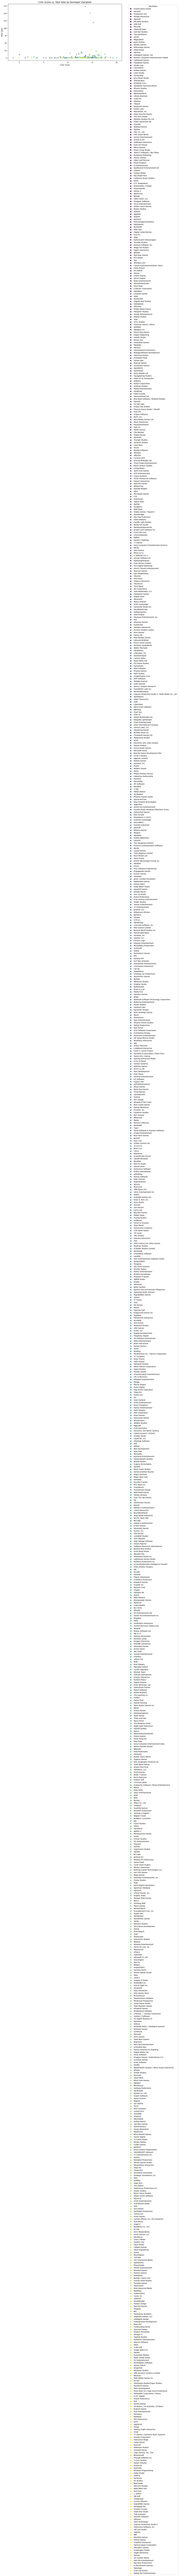

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
developer_stats = df.groupby('developer').agg({'critic_score': 'mean', 'total_sales': 'sum'}).reset_index()

developer_stats_sample = developer_stats.sample(n=1000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=developer_stats_sample, x='critic_score', y='total_sales', hue='developer', palette='viridis', alpha=0.7)
plt.title('Critic Scores vs. Total Sales by Developer (Sampled)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Developer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
top_10_critic_score = developer_stats.sort_values(by=['critic_score','total_sales'],kind='quicksort', ascending=[False,False])
filtered_stats = top_10_critic_score[top_10_critic_score['total_sales'] >= 10].head(10)
filtered_stats

developer  critic_score  total_sales
6362          Rockstar Games      9.800000        19.71
4945                  Mojang      9.400000        17.81
5137             Naughty Dog      9.083333        23.47
6366          Rockstar North      9.060870       116.91
7951          Ubisoft Quebec      9.050000        12.32
6374      Rocksteady Studios      9.025000        25.48
1074  Blizzard Entertainment      8.928571        13.60
1248                  Bungie      8.900000        33.44
7885         Turn 10 Studios      8.900000        14.52
7374                    TOSE      8.750000        16.87

# 8. ผู้พัฒนายอดเยี่ยมโดยคะแนนวิจารณ์สูงสุดและยอดขายรวมมากกว่า 10 ล้าน

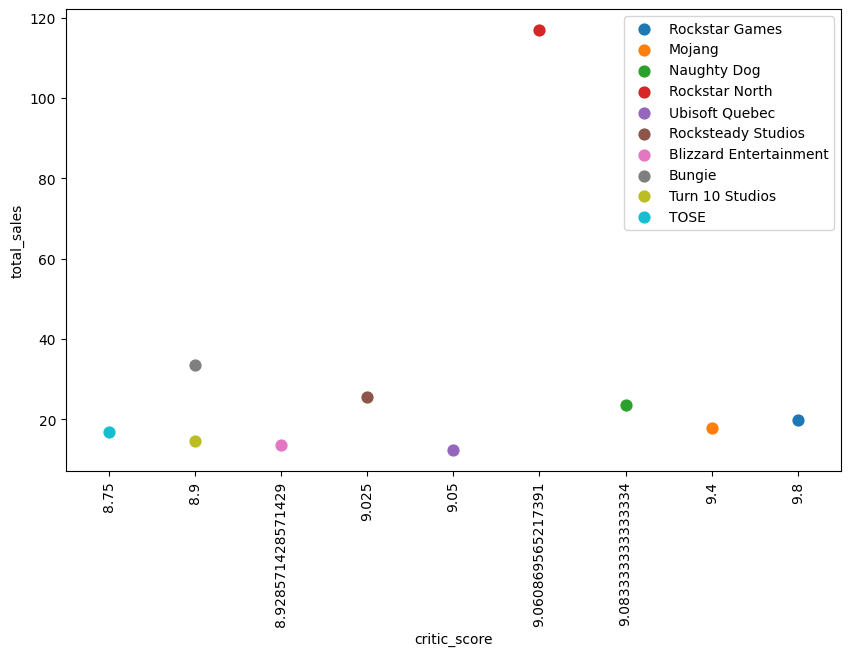

In [22]:
plt.figure(figsize=(10,6))
sns.pointplot(x='critic_score',y='total_sales',hue='developer',data=filtered_stats)
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.show()

เกมที่มียอดขายคงที่ในระยะยาว

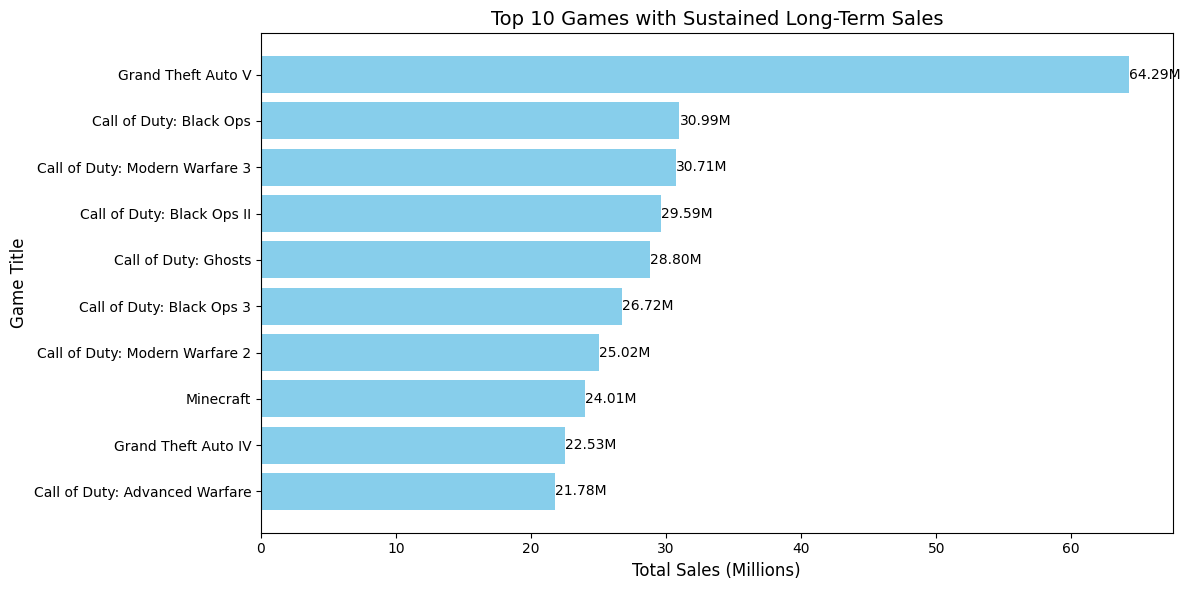

In [23]:
df['release_date'] = pd.to_datetime(df['release_date'])

long_term_period = pd.DateOffset(years=2)

df['long_term_end_date'] = df['release_date'] + long_term_period
long_term_sales = df[df['release_date'] <= df['long_term_end_date']]
long_term_sales_agg = long_term_sales.groupby('title')['total_sales'].sum().reset_index()
long_term_sales_agg = long_term_sales_agg.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(12, 6))
top_n = 10  
plt.barh(long_term_sales_agg['title'].head(top_n), long_term_sales_agg['total_sales'].head(top_n), color='skyblue')
plt.xlabel('Total Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.title(f'Top {top_n} Games with Sustained Long-Term Sales', fontsize=14)
plt.gca().invert_yaxis()  

for index, value in enumerate(long_term_sales_agg['total_sales'].head(top_n)):
    plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 9. ผลกระทบของบทวิจารณ์จากนักวิจารณ์ต่อประสิทธิภาพของเกม

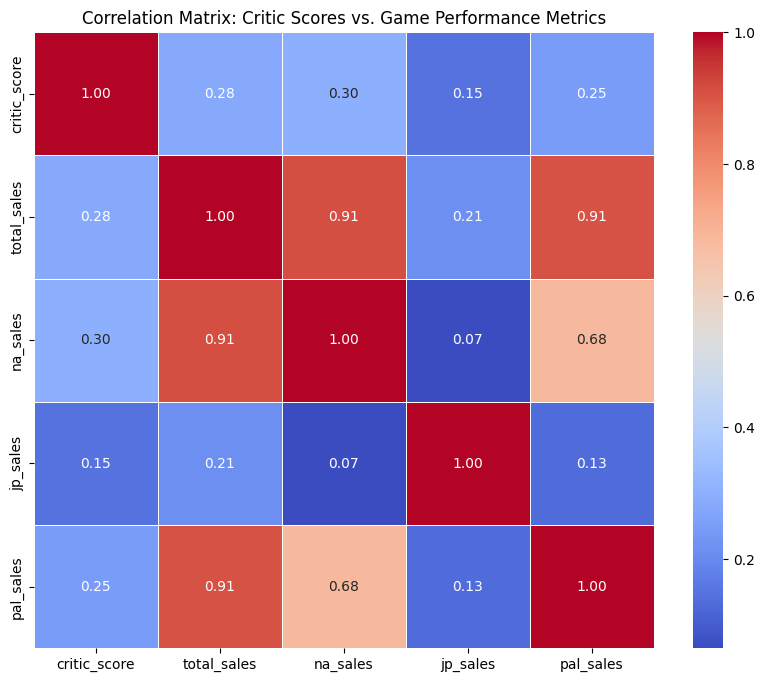

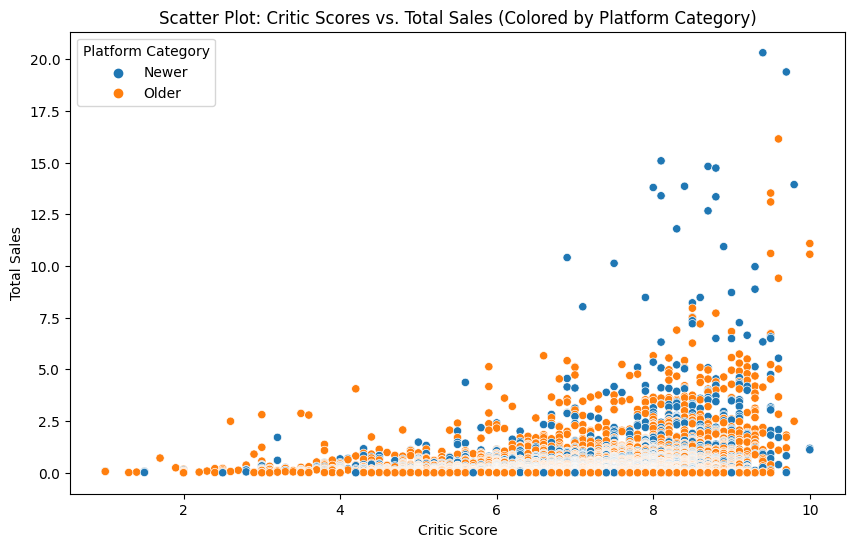

In [24]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Critic Scores vs. Game Performance Metrics')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category')
plt.title('Scatter Plot: Critic Scores vs. Total Sales (Colored by Platform Category)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.show()